In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error,mean_absolute_error
warnings.filterwarnings("ignore")
sns.set()

In [2]:
df_yt = pd.read_csv("youtube_trending.csv")
df_yt.head(5)

publish_time                channel_id  \
0  2021-02-05T09:00:34Z  UCEf_Bc-KVd7onSeifS3py9g   
1  2021-02-04T15:54:08Z  UCYEa4_MC7OFjcWrO6SO-u8g   
2  2021-02-06T03:00:22Z  UCu12RxQjRQyh79YBYvEDkOg   
3  2021-02-05T20:26:08Z  UCCuzDCoI3EUOo_nhCj4noSw   
4  2021-02-03T23:14:54Z  UC14UlmYlSNiQCBe9Eookf_A   

                                               title  \
0                        aespa 에스파 'Forever (약속)' MV   
1  [FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...   
2     CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12)   
3                        With Windah Basudara & Hans   
4  🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...   

                                         description  thumbnail_url  \
0  aespa's new single "Forever" is out!\nListen a...            NaN   
1  Jakarta, https://www.tvonenews.com - Ketua umu...            NaN   
2  Road Party Season 2: Cabriolet Challenge\n\nEp...            NaN   
3  Join this channel to get access to perks:\nhtt...            NaN   
4  With just two minutes to play, Barça looked to...            NaN   

   thumbnail_width  thumbnail_height            channel_name  \
0              NaN               NaN                  SMTOWN   
1              NaN               NaN  Indonesia Lawyers Club   
2              NaN               NaN                Motomobi   
3              NaN               NaN                      yb   
4              NaN               NaN            FC Barcelona   

                                                tags  category_id  ...  \
0                                                NaN           10  ...   
1  ['tvone', 'tv one', 'tvonenews', 'indonesia la...           25  ...   
2  ['MotoMobi', 'Mobil', 'motor', 'review', 'indo...            2  ...   
3                                                NaN           20  ...   
4  ['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...           17  ...   

  caption license_status allowed_region blocked_region     view      like  \
0    True           True            NaN            NaN  7806846  857902.0   
1   False           True            NaN            NaN   885038    6765.0   
2   False           True            NaN            NaN   889708   47895.0   
3   False           True            NaN            NaN  1006854   91973.0   
4   False           True            NaN            NaN  6275035  218131.0   

   dislike  favorite  comment               trending_time  
0  24078.0         0  94961.0  2021-02-07 12:46:51.832614  
1   1263.0         0   6365.0  2021-02-07 12:46:51.832649  
2    532.0         0   8785.0  2021-02-07 12:46:51.832664  
3   3967.0         0  12957.0  2021-02-07 12:46:51.832678  
4   4289.0         0  12799.0  2021-02-07 12:46:51.832730  

[5 rows x 26 columns]

In [3]:
df_yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   publish_time       6335 non-null   object 
 1   channel_id         6335 non-null   object 
 2   title              6335 non-null   object 
 3   description        6264 non-null   object 
 4   thumbnail_url      0 non-null      float64
 5   thumbnail_width    0 non-null      float64
 6   thumbnail_height   0 non-null      float64
 7   channel_name       6335 non-null   object 
 8   tags               5717 non-null   object 
 9   category_id        6335 non-null   int64  
 10  live_status        6335 non-null   object 
 11  local_title        6335 non-null   object 
 12  local_description  6264 non-null   object 
 13  duration           6335 non-null   object 
 14  dimension          6335 non-null   object 
 15  definition         6335 non-null   object 
 16  caption            6335 

In [4]:
df_yt.isnull()

publish_time  channel_id  title  description  thumbnail_url  \
0            False       False  False        False           True   
1            False       False  False        False           True   
2            False       False  False        False           True   
3            False       False  False        False           True   
4            False       False  False        False           True   
...            ...         ...    ...          ...            ...   
6330         False       False  False        False           True   
6331         False       False  False        False           True   
6332         False       False  False        False           True   
6333         False       False  False        False           True   
6334         False       False  False        False           True   

      thumbnail_width  thumbnail_height  channel_name   tags  category_id  \
0                True              True         False   True        False   
1                True              True         False  False        False   
2                True              True         False  False        False   
3                True              True         False   True        False   
4                True              True         False  False        False   
...               ...               ...           ...    ...          ...   
6330             True              True         False  False        False   
6331             True              True         False  False        False   
6332             True              True         False  False        False   
6333             True              True         False  False        False   
6334             True              True         False  False        False   

      ...  caption  license_status  allowed_region  blocked_region   view  \
0     ...    False           False            True            True  False   
1     ...    False           False            True            True  False   
2     ...    False           False            True            True  False   
3     ...    False           False            True            True  False   
4     ...    False           False            True            True  False   
...   ...      ...             ...             ...             ...    ...   
6330  ...    False           False            True            True  False   
6331  ...    False           False            True            True  False   
6332  ...    False           False            True            True  False   
6333  ...    False           False            True            True  False   
6334  ...    False           False            True            True  False   

       like  dislike  favorite  comment  trending_time  
0     False    False     False    False          False  
1     False    False     False    False          False  
2     False    False     False    False          False  
3     False    False     False    False          False  
4     False    False     False    False          False  
...     ...      ...       ...      ...            ...  
6330  False    False     False    False          False  
6331  False    False     False    False          False  
6332  False    False     False    False          False  
6333  False    False     False    False          False  
6334  False    False     False    False          False  

[6335 rows x 26 columns]

In [5]:
df_yt.isnull().sum()

publish_time            0
channel_id              0
title                   0
description            71
thumbnail_url        6335
thumbnail_width      6335
thumbnail_height     6335
channel_name            0
tags                  618
category_id             0
live_status             0
local_title             0
local_description      71
duration                0
dimension               0
definition              0
caption                 0
license_status          0
allowed_region       6140
blocked_region       6033
view                    0
like                  116
dislike               116
favorite                0
comment                48
trending_time           0
dtype: int64

<p> description , thumbnail_url , thumbnail_width , thumbnail_height , tags , local_description , allowed_region , blocked_region , like , dislike
    comment -> merupakan colomns yang terdapat data kosong
</p>

<h3>Decision Making</h3>

In [6]:
df_ytC = df_yt.copy()

In [7]:
df_ytC = df_ytC.drop(columns="thumbnail_url")
df_ytC = df_ytC.drop(columns="thumbnail_width")
df_ytC = df_ytC.drop(columns="thumbnail_height")

<p>Disini kami membuat keputusan untuk menghapus colomn thumbnail_url , thumbnail_width , thumbnail_height dikarenakan
semua data yang ada pada colomn ini kosong </p>

In [8]:
df_ytC["local_description"].equals(df_ytC["description"])

True

<p>Disini kami membuat keputusan untuk menghapus colomn local_description dikarenakan isi dari colomn tersebut sama dengan 
description </p>

In [9]:
df_ytC = df_ytC.drop(columns="local_description")

In [10]:
df_ytC.isnull().sum()

publish_time         0
channel_id           0
title                0
description         71
channel_name         0
tags               618
category_id          0
live_status          0
local_title          0
duration             0
dimension            0
definition           0
caption              0
license_status       0
allowed_region    6140
blocked_region    6033
view                 0
like               116
dislike            116
favorite             0
comment             48
trending_time        0
dtype: int64

In [11]:
df_ytC["tags"].loc[(df_ytC["tags"].notnull())]

1       ['tvone', 'tv one', 'tvonenews', 'indonesia la...
2       ['MotoMobi', 'Mobil', 'motor', 'review', 'indo...
4       ['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...
5       ['KUY Entertainment', 'KUY Media', 'KUY', 'raf...
6       ['tvone', 'tvonenews', 'tv one', 'tvone live',...
                              ...                        
6330    ['emirates fa cup', 'emirates fa cup quarter f...
6331    ['KUY Entertainment', 'KUY Media', 'KUY', 'enz...
6332    ['Kepoin Tekno', 'Unboxing', 'Samsung Galaxy A...
6333    ['2pm', 'jeonyeobeen', 'mafia', 'mafia vincenz...
6334    ['snyders cut', 'snyder cut review', 'snyder c...
Name: tags, Length: 5717, dtype: object

In [12]:
df_ytC["title"].loc[(df_ytC["tags"].isnull())]

0                             aespa 에스파 'Forever (약속)' MV
3                             With Windah Basudara & Hans
9       LEPAS HIJAB! RACHEL VENNYA BUKA SUARA KE BOY W...
13      TANTANGAN 100 LAPIS! Makeup, Hairspray, Lakban...
14      GAME POP IT VIRAL! HADIAH NO WA Nasya Kaila Na...
                              ...                        
6276    S-AMOLED 90Hz, Tahan Air, 2-Speaker, Fitur Eks...
6279    Dance Tonight | Official Music | Latest U | V ...
6283                   SuperM : Something Super is Coming
6301    Malaysia Kesal Korea Utara Putuskan Hubungan D...
6312    KLARIFIKASI VIRAL TASYA REVINA VS YOLO INE TAN...
Name: title, Length: 618, dtype: object

In [13]:
df_ytC["description"].loc[(df_ytC["description"].notnull())]

0       aespa's new single "Forever" is out!\nListen a...
1       Jakarta, https://www.tvonenews.com - Ketua umu...
2       Road Party Season 2: Cabriolet Challenge\n\nEp...
3       Join this channel to get access to perks:\nhtt...
4       With just two minutes to play, Barça looked to...
                              ...                        
6330    Leicester City hosted Manchester United in the...
6331    KFC INDONESIA X KUY! ENTERTAINMENT PRESENT : T...
6332    Unboxing & review singkat Samsung Galaxy A72 I...
6333    #tvN 토일드라마 {빈센조} \n\n조직의 배신으로 한국으로 오게 된 이탈리아 마...
6334    Akhirnya tiba juga saatnya! :D\nKali ini kita ...
Name: description, Length: 6264, dtype: object

In [14]:
df_ytC["title"].loc[(df_ytC["description"].isnull())]

19      LESTI: MA DEDE HAMIL! | #NebengBoyNewGeneratio...
81      Lukaku e Ibrahimovic reciben un partido de san...
82                    NEW YEAR 2021!!! PECAH! - #KVLOG105
137     BUKEP BUAT LOMBA NYANYI || KONTRAKAN REMPONG E...
198     TATI TELAT BANGUN || KONTRAKAN REMPONG EPISODE...
                              ...                        
5955    Jiwa Brimob Masih Melekat Pada Diri Asep, Poli...
6046    GOMBALAN MAUT COWOK" TBH KE CIWI" TBH BIKIN NG...
6120    Messi: "Es un gran honor llegar a este número ...
6135                      DEWA KIPAS VS GM IRENE SUKANDAR
6246    BORDIR JADI KEPLING || KONTRAKAN REMPONG EPISO...
Name: title, Length: 71, dtype: object

<p>Dari data diatas dapat ditinjau bahwa data kosong tags dan description ini akan kita isi dengan new value , dikarenakan 
tidak semua video di youtube memiliki tags serta description dan itu sangat wajar , maka dari itu kita memutuskan untuk mengisi tags yang kosong
tersebut dengan new value </p>

In [15]:
df_ytC["tags"].loc[(df_ytC["tags"].isnull())] = "vidYoutube"
df_ytC["tags"].loc[(df_ytC["tags"].isnull())]

Series([], Name: tags, dtype: object)

<p>Disini kita mengisi value dari tags sendiri dengan tags vidYoutube hal ini kami lakukan karena melihat bahwa
tags ini merupakan penanda tambahan pada video dan tidak wajib ada , maka dari itu kita mengisikan value dari tags yang kosong
dengan value vidYoutube dimana artinya Video Youtube agar tags yang kosong memiliki value</p>

In [16]:
df_ytC["description"].loc[(df_ytC["description"].isnull())] = "This Video Uploaded to Youtube"
df_ytC["description"].loc[(df_ytC["description"].isnull())]

Series([], Name: description, dtype: object)

<p>Disini description yang kosong kami isi dengan description. ini dikarenakan description merupakan deskripsi dari video yang 
telah di upload , ini juga sifat nya tidak wajib untuk diisi maka dari itu kami mengisi nya dengan value
'This Video Uploaded to Youtube' hal ini akan menandakan bahwa description yang kosong akan kami isi dengan value tersebut. 
Value baru ini kami buat demikian karena terdengar lebih general dan bisa digunakan bagi video apapun.</p>


In [17]:
df_ytC.isnull().sum()

publish_time         0
channel_id           0
title                0
description          0
channel_name         0
tags                 0
category_id          0
live_status          0
local_title          0
duration             0
dimension            0
definition           0
caption              0
license_status       0
allowed_region    6140
blocked_region    6033
view                 0
like               116
dislike            116
favorite             0
comment             48
trending_time        0
dtype: int64

In [18]:
df_ytC[["title","description","tags"]].loc[(df_ytC["description"] == "This Video Uploaded to Youtube")]

title  \
19    LESTI: MA DEDE HAMIL! | #NebengBoyNewGeneratio...   
81    Lukaku e Ibrahimovic reciben un partido de san...   
82                  NEW YEAR 2021!!! PECAH! - #KVLOG105   
137   BUKEP BUAT LOMBA NYANYI || KONTRAKAN REMPONG E...   
198   TATI TELAT BANGUN || KONTRAKAN REMPONG EPISODE...   
...                                                 ...   
5955  Jiwa Brimob Masih Melekat Pada Diri Asep, Poli...   
6046  GOMBALAN MAUT COWOK" TBH KE CIWI" TBH BIKIN NG...   
6120  Messi: "Es un gran honor llegar a este número ...   
6135                    DEWA KIPAS VS GM IRENE SUKANDAR   
6246  BORDIR JADI KEPLING || KONTRAKAN REMPONG EPISO...   

                         description  \
19    This Video Uploaded to Youtube   
81    This Video Uploaded to Youtube   
82    This Video Uploaded to Youtube   
137   This Video Uploaded to Youtube   
198   This Video Uploaded to Youtube   
...                              ...   
5955  This Video Uploaded to Youtube   
6046  This Video Uploaded to Youtube   
6120  This Video Uploaded to Youtube   
6135  This Video Uploaded to Youtube   
6246  This Video Uploaded to Youtube   

                                                   tags  
19    ['Lesti Kejora', 'Boy William', 'Nebengboy', '...  
81                                           vidYoutube  
82                                           vidYoutube  
137                                          vidYoutube  
198                                          vidYoutube  
...                                                 ...  
5955  ['Aceh', 'Updateaceh', 'acehupdate', 'inewsace...  
6046                                         vidYoutube  
6120                                         vidYoutube  
6135                                         vidYoutube  
6246                                         vidYoutube  

[71 rows x 3 columns]

In [19]:
df_ytC[["allowed_region","blocked_region","title"]].loc[(df_ytC["allowed_region"].notnull())]

allowed_region blocked_region  \
52    ['PH', 'PK', 'ID', 'MY', 'NP', 'BD', 'LK', 'SA...            NaN   
81                                               ['ZW']            NaN   
87                                               ['ID']            NaN   
108                                              ['ID']            NaN   
121                                  ['ID', 'PH', 'TL']            NaN   
...                                                 ...            ...   
6283  ['HK', 'ID', 'KH', 'LA', 'MM', 'MY', 'PH', 'SG...            NaN   
6320                                             ['ID']            NaN   
6321                                             ['ID']            NaN   
6327                                             ['ID']            NaN   
6329                                             ['ID']            NaN   

                                                  title  
52    COBRA GIRL 2021 - New Hollywood Hindi Dubbed A...  
81    Lukaku e Ibrahimovic reciben un partido de san...  
87    Pose Sheren, Memicu Perdebatan Deddy Corbuzier...  
108   Shin Hye Sun Tusuk Kentang Pakai Jarum Akupunt...  
121   Man United 3-2 Liverpool | FA Cup 20/21 Match ...  
...                                                 ...  
6283                 SuperM : Something Super is Coming  
6320  Yumi Berkata Maafkan Aku Belum Bisa Menjadi Ha...  
6321    Demi Gea, Luna Tidak Mau Salah Pilih Foto (2/4)  
6327  IDN CC )  Kalau Suka, Katakan Saja  / Hello Jadoo  
6329  Pose Ilene Menceritakan Despresinya Dia di Mas...  

[195 rows x 3 columns]

In [20]:
df_ytC.head(3)

publish_time                channel_id  \
0  2021-02-05T09:00:34Z  UCEf_Bc-KVd7onSeifS3py9g   
1  2021-02-04T15:54:08Z  UCYEa4_MC7OFjcWrO6SO-u8g   
2  2021-02-06T03:00:22Z  UCu12RxQjRQyh79YBYvEDkOg   

                                               title  \
0                        aespa 에스파 'Forever (약속)' MV   
1  [FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...   
2     CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12)   

                                         description            channel_name  \
0  aespa's new single "Forever" is out!\nListen a...                  SMTOWN   
1  Jakarta, https://www.tvonenews.com - Ketua umu...  Indonesia Lawyers Club   
2  Road Party Season 2: Cabriolet Challenge\n\nEp...                Motomobi   

                                                tags  category_id live_status  \
0                                         vidYoutube           10        none   
1  ['tvone', 'tv one', 'tvonenews', 'indonesia la...           25        none   
2  ['MotoMobi', 'Mobil', 'motor', 'review', 'indo...            2        none   

                                         local_title  duration  ... caption  \
0                        aespa 에스파 'Forever (약속)' MV    PT5M7S  ...    True   
1  [FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...  PT42M30S  ...   False   
2     CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12)  PT46M43S  ...   False   

  license_status  allowed_region  blocked_region     view      like  dislike  \
0           True             NaN             NaN  7806846  857902.0  24078.0   
1           True             NaN             NaN   885038    6765.0   1263.0   
2           True             NaN             NaN   889708   47895.0    532.0   

   favorite  comment               trending_time  
0         0  94961.0  2021-02-07 12:46:51.832614  
1         0   6365.0  2021-02-07 12:46:51.832649  
2         0   8785.0  2021-02-07 12:46:51.832664  

[3 rows x 22 columns]

In [21]:
df_ytC[["title","allowed_region","blocked_region"]].loc[(df_ytC["allowed_region"].isnull() & df_ytC["blocked_region"].notnull())]

title allowed_region  \
12    Arsy Widianto, Tiara Andini - Diam - Diam (Off...            NaN   
34    TREASURE (트레저) - 음(MMM) Rock Ver. [유희열의 스케치북/Y...            NaN   
35    Arsy Widianto, Tiara Andini - Diam - Diam (Off...            NaN   
59    Haaland seals the deal! | Borussia Dortmund vs...            NaN   
84    Juventus 2-0 Roma | CR7 Scores To Close The Ga...            NaN   
...                                                 ...            ...   
6236  ROSÉ: On The Ground | The Tonight Show Starrin...            NaN   
6262  Rising star Lee Zii Jia rivals last year’s cha...            NaN   
6263  Chеlѕеа VS Atlеtiсo mаԁrіd 2-0 All Gоаls & Hіg...            NaN   
6287  Best Action Movies 2021 - Latest Hong Kong Pla...            NaN   
6289  서로가 서로를 신기해하는 이 상황...ㅋㅋ BTS 여고생과 BTS의 만남!#유퀴즈온...            NaN   

                                         blocked_region  
12                                   ['IO', 'KP', 'SS']  
34                                               ['KR']  
35                       ['CA', 'IO', 'KP', 'SS', 'US']  
59                 ['DE', 'LU', 'LI', 'CH', 'AT', 'JP']  
84                                               ['IT']  
...                                                 ...  
6236  ['AO', 'BF', 'BI', 'BJ', 'BW', 'CD', 'CF', 'CG...  
6262         ['BD', 'BT', 'IN', 'LK', 'MV', 'NP', 'PK']  
6263  ['AD', 'AE', 'AF', 'AG', 'AI', 'AL', 'AM', 'AO...  
6287               ['CN', 'HK', 'PK', 'SG', 'TW', 'VN']  
6289                                             ['KR']  

[302 rows x 3 columns]

In [22]:
df_ytC[["title","allowed_region","blocked_region"]].loc[(df_ytC["allowed_region"].notnull()) & (df_ytC["blocked_region"].isnull())]

title  \
52    COBRA GIRL 2021 - New Hollywood Hindi Dubbed A...   
81    Lukaku e Ibrahimovic reciben un partido de san...   
87    Pose Sheren, Memicu Perdebatan Deddy Corbuzier...   
108   Shin Hye Sun Tusuk Kentang Pakai Jarum Akupunt...   
121   Man United 3-2 Liverpool | FA Cup 20/21 Match ...   
...                                                 ...   
6283                 SuperM : Something Super is Coming   
6320  Yumi Berkata Maafkan Aku Belum Bisa Menjadi Ha...   
6321    Demi Gea, Luna Tidak Mau Salah Pilih Foto (2/4)   
6327  IDN CC )  Kalau Suka, Katakan Saja  / Hello Jadoo   
6329  Pose Ilene Menceritakan Despresinya Dia di Mas...   

                                         allowed_region blocked_region  
52    ['PH', 'PK', 'ID', 'MY', 'NP', 'BD', 'LK', 'SA...            NaN  
81                                               ['ZW']            NaN  
87                                               ['ID']            NaN  
108                                              ['ID']            NaN  
121                                  ['ID', 'PH', 'TL']            NaN  
...                                                 ...            ...  
6283  ['HK', 'ID', 'KH', 'LA', 'MM', 'MY', 'PH', 'SG...            NaN  
6320                                             ['ID']            NaN  
6321                                             ['ID']            NaN  
6327                                             ['ID']            NaN  
6329                                             ['ID']            NaN  

[195 rows x 3 columns]

In [23]:
df_ytC[["title","allowed_region","blocked_region"]].loc[(df_ytC["allowed_region"].notnull()) & (df_ytC["blocked_region"].notnull())]

Empty DataFrame
Columns: [title, allowed_region, blocked_region]
Index: []

In [24]:
df_ytC[["title","allowed_region","blocked_region"]].loc[(df_ytC["allowed_region"].isnull()) & (df_ytC["blocked_region"].isnull())]

title allowed_region  \
0                           aespa 에스파 'Forever (약속)' MV            NaN   
1     [FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...            NaN   
2        CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12)            NaN   
3                           With Windah Basudara & Hans            NaN   
4     🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...            NaN   
...                                                 ...            ...   
6330  Leicester City v Manchester United | Key Momen...            NaN   
6331  THIS OR THAT: BORIS DUKUNG ENZY DIKTA JADI SAH...            NaN   
6332  ⚡️ Kirain Flagship Bos! Samsung Galaxy A72 Ind...            NaN   
6333  [11화 예고] "겁나면 도망가봐" 폭주하는 옥택연 자극하는 송중기의 도발!#빈센조...            NaN   
6334  Justice League Snyder's Cut - (NGOPI - Ngobrol...            NaN   

     blocked_region  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
6330            NaN  
6331            NaN  
6332            NaN  
6333            NaN  
6334            NaN  

[5838 rows x 3 columns]

In [25]:
df_ytC["allowed_region"].loc[(df_ytC["allowed_region"].isnull())] = "All Region"
df_ytC["allowed_region"].loc[(df_ytC["allowed_region"].isnull())]

Series([], Name: allowed_region, dtype: object)

<p>Disini kita memutuskan untuk mengisi data allowed_region dengan All Region karena diasumsikan ketika allowed_region berisi Nan
atau null itu berarti video tersebut diperolehkan di semua region</p>

In [26]:
df_ytC[["title","description","allowed_region"]].loc[(df_ytC["allowed_region"] == "All Region")]

title  \
0                           aespa 에스파 'Forever (약속)' MV   
1     [FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...   
2        CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12)   
3                           With Windah Basudara & Hans   
4     🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...   
...                                                 ...   
6330  Leicester City v Manchester United | Key Momen...   
6331  THIS OR THAT: BORIS DUKUNG ENZY DIKTA JADI SAH...   
6332  ⚡️ Kirain Flagship Bos! Samsung Galaxy A72 Ind...   
6333  [11화 예고] "겁나면 도망가봐" 폭주하는 옥택연 자극하는 송중기의 도발!#빈센조...   
6334  Justice League Snyder's Cut - (NGOPI - Ngobrol...   

                                            description allowed_region  
0     aespa's new single "Forever" is out!\nListen a...     All Region  
1     Jakarta, https://www.tvonenews.com - Ketua umu...     All Region  
2     Road Party Season 2: Cabriolet Challenge\n\nEp...     All Region  
3     Join this channel to get access to perks:\nhtt...     All Region  
4     With just two minutes to play, Barça looked to...     All Region  
...                                                 ...            ...  
6330  Leicester City hosted Manchester United in the...     All Region  
6331  KFC INDONESIA X KUY! ENTERTAINMENT PRESENT : T...     All Region  
6332  Unboxing & review singkat Samsung Galaxy A72 I...     All Region  
6333  #tvN 토일드라마 {빈센조} \n\n조직의 배신으로 한국으로 오게 된 이탈리아 마...     All Region  
6334  Akhirnya tiba juga saatnya! :D\nKali ini kita ...     All Region  

[6140 rows x 3 columns]

In [27]:
df_ytC["blocked_region"].loc[(df_ytC["blocked_region"].isnull())] = "-"
df_ytC["blocked_region"].loc[(df_ytC["blocked_region"].isnull())]

Series([], Name: blocked_region, dtype: object)

<p>Disini kita memustukan untuk mengisi data blocked_region dengan nilai "-" karena diasumsikan bahwa ketika nilai blocked region nya nan atau null maka video tersebut tidak diblock di region manapun</p>

In [28]:
df_ytC[["title","description","blocked_region"]].loc[(df_ytC["blocked_region"] == "-")]

title  \
0                           aespa 에스파 'Forever (약속)' MV   
1     [FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...   
2        CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12)   
3                           With Windah Basudara & Hans   
4     🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...   
...                                                 ...   
6330  Leicester City v Manchester United | Key Momen...   
6331  THIS OR THAT: BORIS DUKUNG ENZY DIKTA JADI SAH...   
6332  ⚡️ Kirain Flagship Bos! Samsung Galaxy A72 Ind...   
6333  [11화 예고] "겁나면 도망가봐" 폭주하는 옥택연 자극하는 송중기의 도발!#빈센조...   
6334  Justice League Snyder's Cut - (NGOPI - Ngobrol...   

                                            description blocked_region  
0     aespa's new single "Forever" is out!\nListen a...              -  
1     Jakarta, https://www.tvonenews.com - Ketua umu...              -  
2     Road Party Season 2: Cabriolet Challenge\n\nEp...              -  
3     Join this channel to get access to perks:\nhtt...              -  
4     With just two minutes to play, Barça looked to...              -  
...                                                 ...            ...  
6330  Leicester City hosted Manchester United in the...              -  
6331  KFC INDONESIA X KUY! ENTERTAINMENT PRESENT : T...              -  
6332  Unboxing & review singkat Samsung Galaxy A72 I...              -  
6333  #tvN 토일드라마 {빈센조} \n\n조직의 배신으로 한국으로 오게 된 이탈리아 마...              -  
6334  Akhirnya tiba juga saatnya! :D\nKali ini kita ...              -  

[6033 rows x 3 columns]

In [29]:
df_ytC.isnull().sum()

publish_time        0
channel_id          0
title               0
description         0
channel_name        0
tags                0
category_id         0
live_status         0
local_title         0
duration            0
dimension           0
definition          0
caption             0
license_status      0
allowed_region      0
blocked_region      0
view                0
like              116
dislike           116
favorite            0
comment            48
trending_time       0
dtype: int64

In [30]:
df_ytC[["comment","like","dislike","title"]].loc[(df_ytC["like"].isnull())]

comment  like  dislike  \
40     4100.0   NaN      NaN   
81        NaN   NaN      NaN   
239     309.0   NaN      NaN   
247    4128.0   NaN      NaN   
292       NaN   NaN      NaN   
...       ...   ...      ...   
6120      NaN   NaN      NaN   
6139   3205.0   NaN      NaN   
6195   1529.0   NaN      NaN   
6263    840.0   NaN      NaN   
6283   1908.0   NaN      NaN   

                                                  title  
40    Jemimah Punya Challenge Sangat Menarik - Spekt...  
81    Lukaku e Ibrahimovic reciben un partido de san...  
239              One Piece Episode 961 Sub Indo Terbaru  
247   Jemimah Punya Challenge Sangat Menarik - Spekt...  
292   Lukaku e Ibrahimovic reciben un partido de san...  
...                                                 ...  
6120  Messi: "Es un gran honor llegar a este número ...  
6139  Keren Abis!! Penampilan Judika & Rossa Feat We...  
6195  UNFAIR, Media Malaysia Buka Suara Drama All En...  
6263  Chеlѕеа VS Atlеtiсo mаԁrіd 2-0 All Gоаls & Hіg...  
6283                 SuperM : Something Super is Coming  

[116 rows x 4 columns]

In [31]:
df_ytC["like"].loc[(df_ytC["like"].isnull())] = 0
df_ytC["like"].loc[(df_ytC["like"].isnull())]

Series([], Name: like, dtype: float64)

In [32]:
df_ytC["dislike"].loc[(df_ytC["dislike"].isnull())] = 0
df_ytC["dislike"].loc[(df_ytC["dislike"].isnull())]

Series([], Name: dislike, dtype: float64)

In [33]:
df_ytC["comment"].loc[(df_ytC["comment"].isnull())] = 0
df_ytC["comment"].loc[(df_ytC["comment"].isnull())]

Series([], Name: comment, dtype: float64)

<p>Disini kami memutuskan untuk mengisi data dengan kosong pada colom like , dislike , comment dengan nilai 0 karena dari data yang kita lihat ketika data itu NaN berarti tidak terdapat like atau dislike atau comment pada video tersebut.</p>

In [34]:
df_ytC = df_ytC.drop(columns="favorite")

In [35]:
df_ytC.isnull().sum()

publish_time      0
channel_id        0
title             0
description       0
channel_name      0
tags              0
category_id       0
live_status       0
local_title       0
duration          0
dimension         0
definition        0
caption           0
license_status    0
allowed_region    0
blocked_region    0
view              0
like              0
dislike           0
comment           0
trending_time     0
dtype: int64

<p>Data Sudah Bersih</p>

<h4>Analisis Korelasi Antar Variabel</h4>

In [36]:
import pandas_profiling as pp
profile = pp.ProfileReport(df_ytC)
profile

Profilling pandas dimana disini terdapat banyak informasi untuk mengetahui bagaimana karakteristik variabel yang ada dalam dataset tersebut. Dalam pandas profiling juga kita dapat melihat tentang statistik deskriptif dari variabel yang ada dalam dataset. Disini juga dapat dilihat korelasi untuk berbagai variabel, Sebagai contoh terdapat indicator untuk mengukur kekuatan korelasi antar variabel dimana korelasi tersebut dapat diukur melalui beberapa versi. Yaitu versi korelasi pearson , spearman ,kendall , phik dan cramer's V. Profilin juga dapat melihat data missing yang ada pada dataset serta melihat beberapa data yang ada padadataset

In [37]:
df_ytC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publish_time    6335 non-null   object 
 1   channel_id      6335 non-null   object 
 2   title           6335 non-null   object 
 3   description     6335 non-null   object 
 4   channel_name    6335 non-null   object 
 5   tags            6335 non-null   object 
 6   category_id     6335 non-null   int64  
 7   live_status     6335 non-null   object 
 8   local_title     6335 non-null   object 
 9   duration        6335 non-null   object 
 10  dimension       6335 non-null   object 
 11  definition      6335 non-null   object 
 12  caption         6335 non-null   bool   
 13  license_status  6335 non-null   bool   
 14  allowed_region  6335 non-null   object 
 15  blocked_region  6335 non-null   object 
 16  view            6335 non-null   int64  
 17  like            6335 non-null   f

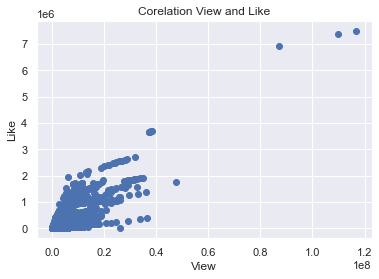

In [38]:
plt.scatter(df_ytC["view"],df_ytC["like"])
plt.xlabel('View')
plt.ylabel('Like')
plt.title('Corelation View and Like')
plt.show()

In [39]:
from scipy import stats
stat = stats.pearsonr(df_ytC["view"], df_ytC["like"])
stat[0]

0.8455570619335941

In [40]:
stat = stats.spearmanr(df_ytC["view"], df_ytC["like"])
stat[0]

0.779194758963916

Untuk korelasi antara View dan Like membentuk hubungan linear dikarenakan memiliki nilai uji statistik pearson lebih tinggi dibandung uji statistik spearman nya 

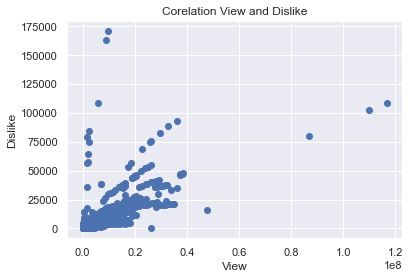

In [41]:
plt.scatter(df_ytC["view"],df_ytC["dislike"])
plt.xlabel('View')
plt.ylabel('Dislike')
plt.title('Corelation View and Dislike')
plt.show()

In [42]:
stat = stats.pearsonr(df_ytC["view"], df_ytC["dislike"])
stat[0]

0.7368190165294173

In [43]:
stat = stats.spearmanr(df_ytC["view"], df_ytC["dislike"])
stat[0]

0.8855064642519662

Untuk korelasi antara View dan Dislike membentuk hubungan bukan linear dikarenakan memiliki nilai uji statistik spearman lebih tinggi dibandung uji statistik pearson nya

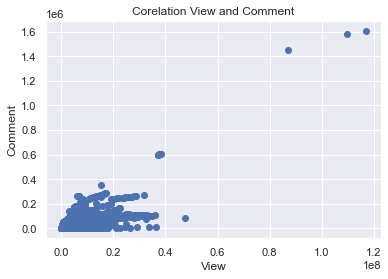

In [44]:
plt.scatter(df_ytC["view"],df_ytC["comment"])
plt.xlabel('View')
plt.ylabel('Comment')
plt.title('Corelation View and Comment')
plt.show()

In [45]:
stat = stats.pearsonr(df_ytC["view"], df_ytC["comment"])
stat[0]

0.7574580837824955

In [46]:
stat = stats.spearmanr(df_ytC["view"], df_ytC["comment"])
stat[0]

0.6986608050536532

Untuk korelasi antara View dan Comment membentuk hubungan linear 
dikarenakan memiliki nilai uji statistik pearson lebih tinggi dibandung uji statistik spearman nya

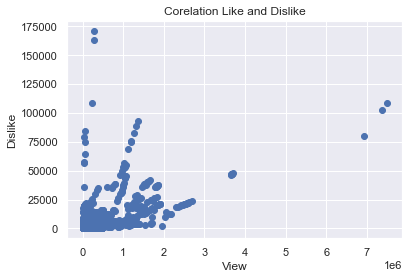

In [47]:
plt.scatter(df_ytC["like"],df_ytC["dislike"])
plt.xlabel('View')
plt.ylabel('Dislike')
plt.title('Corelation Like and Dislike')
plt.show()

In [48]:
stat = stats.pearsonr(df_ytC["like"], df_ytC["dislike"])
stat[0]

0.6078635615743042

In [49]:
stat = stats.spearmanr(df_ytC["like"], df_ytC["dislike"])
stat[0]

0.7694136345908059

Untuk korelasi antara like dan dislike membentuk hubungan bukan linear dikarenakan memiliki nilai uji statistik spearman lebih tinggi dibandung uji statistik pearson nya

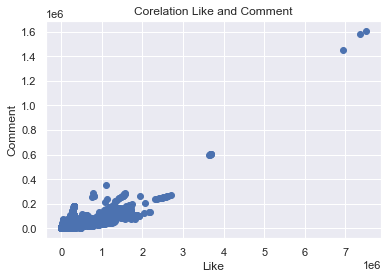

In [50]:
plt.scatter(df_ytC["like"],df_ytC["comment"])
plt.xlabel('Like')
plt.ylabel('Comment')
plt.title('Corelation Like and Comment')
plt.show()

In [51]:
stat = stats.pearsonr(df_ytC["like"], df_ytC["comment"])
stat[0]

0.8689239961989209

In [52]:
stat = stats.spearmanr(df_ytC["like"], df_ytC["comment"])
stat[0]

0.7917988960060969

Untuk korelasi antara like dan comment membentuk hubungan linear dikarenakan memiliki nilai uji statistik pearson lebih tinggi dibandung uji statistik spearman nya

<h4>Analisis Deskriptif</h4>

In [53]:
df_ytC.describe()

category_id          view          like        dislike       comment
count  6335.000000  6.335000e+03  6.335000e+03    6335.000000  6.335000e+03
mean     18.452249  2.132116e+06  1.083864e+05    2327.877506  1.248456e+04
std       7.241158  4.542232e+06  3.309556e+05    7004.289935  4.843887e+04
min       1.000000  1.752900e+04  0.000000e+00       0.000000  0.000000e+00
25%      10.000000  2.615615e+05  5.937500e+03     131.000000  7.350000e+02
50%      22.000000  7.773690e+05  1.989700e+04     469.000000  2.479000e+03
75%      24.000000  2.089418e+06  7.080350e+04    1747.000000  8.453000e+03
max      29.000000  1.168906e+08  7.497717e+06  171177.000000  1.608151e+06

In [54]:
df_ytC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publish_time    6335 non-null   object 
 1   channel_id      6335 non-null   object 
 2   title           6335 non-null   object 
 3   description     6335 non-null   object 
 4   channel_name    6335 non-null   object 
 5   tags            6335 non-null   object 
 6   category_id     6335 non-null   int64  
 7   live_status     6335 non-null   object 
 8   local_title     6335 non-null   object 
 9   duration        6335 non-null   object 
 10  dimension       6335 non-null   object 
 11  definition      6335 non-null   object 
 12  caption         6335 non-null   bool   
 13  license_status  6335 non-null   bool   
 14  allowed_region  6335 non-null   object 
 15  blocked_region  6335 non-null   object 
 16  view            6335 non-null   int64  
 17  like            6335 non-null   f

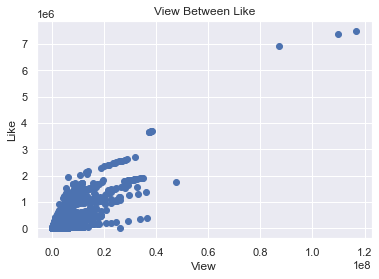

In [55]:
plt.scatter(df_ytC["view"],df_ytC["like"])
plt.title('View Between Like')
plt.xlabel('View')
plt.ylabel('Like')
plt.show()

Dari gambar diatas dapat diketahui bahwa Like dan View memiliki hubungan dimana ketika View jumlahnya banyak maka jumlah like juga akan mengikuti.

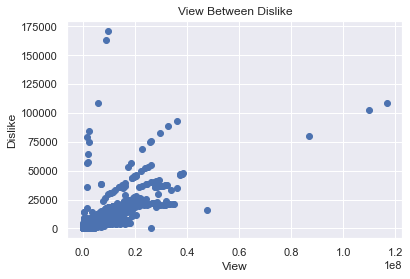

In [56]:
plt.scatter(df_ytC["view"],df_ytC["dislike"])
plt.title('View Between Dislike')
plt.xlabel('View')
plt.ylabel('Dislike')
plt.show()

Pada umumnya jumlah dislike pada view yang banyak cenderung sedikit namun pada kasus tertentu terdapat dislike yang banyak di karenakan isi dari content yang ditampilkan.

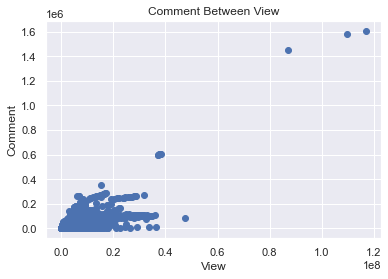

In [57]:
plt.scatter(df_ytC["view"],df_ytC["comment"])
plt.title('Comment Between View')
plt.xlabel('View')
plt.ylabel('Comment')
plt.show()

Pada gambar diatas dapat dilihat bahwa jumlah comment akan mengikuti jumlah view karena orang-orang yang menonton video akan cenderung berkomentar pada konten yang telah di tonton.

<h4>Prediksi yang akan Dilakukan</h4>

<p>Prediksi yang akan dilakukan ialah menggunakan regresi , dimana targetnya merupakan beberapa variabel yang 
terdapat pada dataset , hal ini penting dilakukan agar kita dapat melihat hubungan serta keterkaitan antara variabel nya , 
contohnya : apakah like atau dislike dipengaruhi oleh jumlah view dari video?</p>

<h4>Feature Engineering</h4>

In [58]:
df_ft = df_ytC.copy()

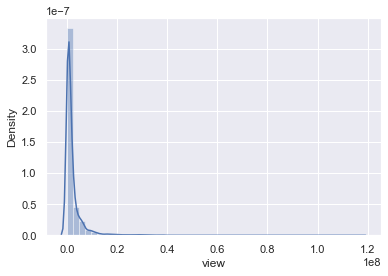

<Figure size 432x288 with 0 Axes>

In [59]:
sns.distplot(df_ft['view'],hist=True,kde=True)
fig = plt.figure()

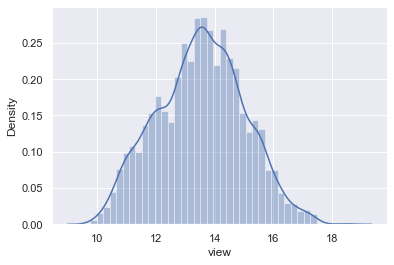

<Figure size 432x288 with 0 Axes>

In [60]:
df_ft['view'] = np.log(df_ft['view'])
sns.distplot(df_ft['view'],hist=True,kde=True)
fig = plt.figure()

Fitur Transformation yang kami gunakan ialah , Log Transformation agar data yang tadinya right skew , dapat menjadi data yang distribusinya mendekati normal

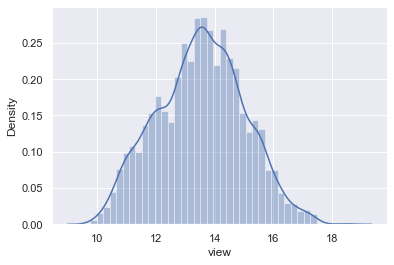

<Figure size 432x288 with 0 Axes>

In [61]:
sns.distplot(df_ft['view'],hist=True,kde=True)
fig = plt.figure()

<h3>Using Box Cox Transformation </h3>

In [62]:
df_ft = df_ytC.copy()

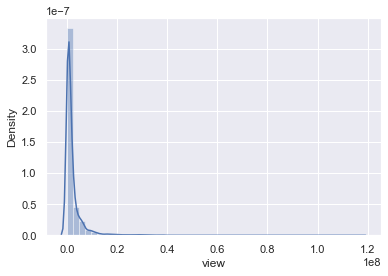

<Figure size 432x288 with 0 Axes>

In [63]:
sns.distplot(df_ft['view'],hist=True,kde=True)
fig = plt.figure()

In [64]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df_ft['view'], shuffle=False)
train_data,fitted_lambda = stats.boxcox(train)

In [65]:
boxcox_data = stats.boxcox(test, fitted_lambda)

<AxesSubplot:ylabel='Density'>

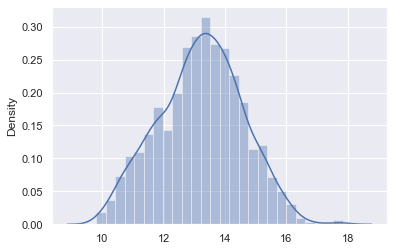

In [66]:
sns.distplot(boxcox_data)

<h4>Feature Extraction</h4>

In [67]:
df_fe = df_ft.copy()

In [68]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publish_time    6335 non-null   object 
 1   channel_id      6335 non-null   object 
 2   title           6335 non-null   object 
 3   description     6335 non-null   object 
 4   channel_name    6335 non-null   object 
 5   tags            6335 non-null   object 
 6   category_id     6335 non-null   int64  
 7   live_status     6335 non-null   object 
 8   local_title     6335 non-null   object 
 9   duration        6335 non-null   object 
 10  dimension       6335 non-null   object 
 11  definition      6335 non-null   object 
 12  caption         6335 non-null   bool   
 13  license_status  6335 non-null   bool   
 14  allowed_region  6335 non-null   object 
 15  blocked_region  6335 non-null   object 
 16  view            6335 non-null   int64  
 17  like            6335 non-null   f

In [69]:
df_fe = df_fe.select_dtypes(include=['float64','int64'])
print(df_fe)

      category_id     view      like  dislike  comment
0              10  7806846  857902.0  24078.0  94961.0
1              25   885038    6765.0   1263.0   6365.0
2               2   889708   47895.0    532.0   8785.0
3              20  1006854   91973.0   3967.0  12957.0
4              17  6275035  218131.0   4289.0  12799.0
...           ...      ...       ...      ...      ...
6330           17  1759973   15523.0    907.0   1722.0
6331           24   760192   29326.0    350.0   1980.0
6332           28    89654    1248.0     63.0    469.0
6333           24  1353291   15789.0    227.0   1519.0
6334           24    65250    4843.0     52.0   1125.0

[6335 rows x 5 columns]


Select data numeric yang terdapat pada dataset

In [70]:
df_fe = df_fe.to_numpy()

In [71]:
print(df_fe)

[[1.000000e+01 7.806846e+06 8.579020e+05 2.407800e+04 9.496100e+04]
 [2.500000e+01 8.850380e+05 6.765000e+03 1.263000e+03 6.365000e+03]
 [2.000000e+00 8.897080e+05 4.789500e+04 5.320000e+02 8.785000e+03]
 ...
 [2.800000e+01 8.965400e+04 1.248000e+03 6.300000e+01 4.690000e+02]
 [2.400000e+01 1.353291e+06 1.578900e+04 2.270000e+02 1.519000e+03]
 [2.400000e+01 6.525000e+04 4.843000e+03 5.200000e+01 1.125000e+03]]


Menjadikan dataframe sebagai matrix

In [72]:
df_fe= (df_fe - df_fe.mean()) / df_fe.std()

Normalisasi data agar nilai atau informasi yang ada dalam data tidak hilang dan tetap mengandung informasi yang relevan

In [73]:
print(df_fe)

[[-0.20468329  3.33795162  0.18461631 -0.19376156 -0.16159583]
 [-0.20467649  0.19693025 -0.20161797 -0.2041147  -0.20179948]
 [-0.20468692  0.19904944 -0.18295374 -0.20444642 -0.20070132]
 ...
 [-0.20467512 -0.16400408 -0.2041215  -0.20465924 -0.204475  ]
 [-0.20467694  0.40941703 -0.197523   -0.20458482 -0.20399853]
 [-0.20467694 -0.17507828 -0.20249014 -0.20466423 -0.20417732]]


In [74]:
covarianceMatrix = np.cov(df_fe.T)
dfcov = pd.DataFrame(covarianceMatrix)
print('Covariance matrix \n%s\n' %dfcov)

Covariance matrix 
              0             1             2             3             4
0  1.079739e-11  2.694261e-08 -4.488260e-08 -1.016382e-10 -6.101599e-09
1  2.694261e-08  4.248555e+00  2.617487e-01  4.827218e-03  3.431821e-02
2 -4.488260e-08  2.617487e-01  2.255496e-02  2.901634e-04  2.868456e-03
3 -1.016382e-10  4.827218e-03  2.901634e-04  1.010255e-05  4.009804e-05
4 -6.101599e-09  3.431821e-02  2.868456e-03  4.009804e-05  4.831597e-04



In [75]:
eigenvalue, eigenvector = np.linalg.eig(covarianceMatrix)
dfev = pd.DataFrame(eigenvector)
print('Eigenvector \n%s\n' %dfev)
print('Eigenvalue \n%s\n' %eigenvalue)

Eigenvector 
              0         1         2             3         4
0 -5.645299e-09  0.000007 -0.000007 -1.000000e+00  0.000037
1 -9.980686e-01  0.062106 -0.000734  5.029227e-07  0.001191
2 -6.158415e-02 -0.991028 -0.118577 -6.495854e-06 -0.003160
3 -1.133907e-03  0.001156  0.017574 -3.721458e-05 -0.999844
4 -8.073297e-03 -0.118341  0.992789 -6.696959e-06  0.017322

Eigenvalue 
[4.26498880e+00 6.49390475e-03 1.15894873e-04 1.04476432e-11
 4.57582313e-06]



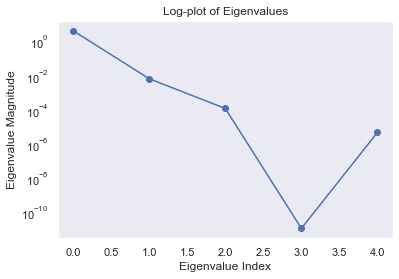

In [76]:
import matplotlib.pyplot as plt
plt.semilogy( eigenvalue.real, '-o' )
plt.title("Log-plot of Eigenvalues")
plt.xlabel( "Eigenvalue Index" )
plt.ylabel( "Eigenvalue Magnitude" )
plt.grid()
plt.show()

In [77]:
dfeval = pd.DataFrame(eigenvalue)
print(dfeval)

              0
0  4.264989e+00
1  6.493905e-03
2  1.158949e-04
3  1.044764e-11
4  4.575823e-06


In [78]:
# Jumlah N principal yang dipilih
nPrincipal = 3

# Bangun Vektor Baru
fv = eigenvector[:,:nPrincipal]
dfNew = pd.DataFrame(fv)

print('New feature vector \n%s\n' %dfNew)

New feature vector 
              0         1         2
0 -5.645299e-09  0.000007 -0.000007
1 -9.980686e-01  0.062106 -0.000734
2 -6.158415e-02 -0.991028 -0.118577
3 -1.133907e-03  0.001156  0.017574
4 -8.073297e-03 -0.118341  0.992789



In [79]:
# Transformasikan data yang sudah dinormalisasi dengan Feature Vector
transformedData = df_fe.dot(fv)
dfTranformed = pd.DataFrame(transformedData)
print('Transformed data \n%s\n' %dfTranformed)

Transformed data 
             0         1         2
0    -3.341350  0.043244 -0.188176
1    -0.182273  0.235683 -0.180167
2    -0.185546  0.217188 -0.181298
3    -0.239851  0.200445 -0.181802
4    -2.629387  0.292190 -0.190413
...        ...       ...       ...
6330 -0.578767  0.256652 -0.183025
6331 -0.126343  0.222254 -0.183323
6332  0.178141  0.216064 -0.182271
6333 -0.394583  0.245082 -0.183000
6334  0.189091  0.213725 -0.182161

[6335 rows x 3 columns]



<h4>Feature Selection</h4>

In [80]:
df_select = df_ytC.copy()
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publish_time    6335 non-null   object 
 1   channel_id      6335 non-null   object 
 2   title           6335 non-null   object 
 3   description     6335 non-null   object 
 4   channel_name    6335 non-null   object 
 5   tags            6335 non-null   object 
 6   category_id     6335 non-null   int64  
 7   live_status     6335 non-null   object 
 8   local_title     6335 non-null   object 
 9   duration        6335 non-null   object 
 10  dimension       6335 non-null   object 
 11  definition      6335 non-null   object 
 12  caption         6335 non-null   bool   
 13  license_status  6335 non-null   bool   
 14  allowed_region  6335 non-null   object 
 15  blocked_region  6335 non-null   object 
 16  view            6335 non-null   int64  
 17  like            6335 non-null   f

In [81]:
X = df_ytC.copy()
y = X.pop("view")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [82]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

dislike          1.283876e+00
channel_id       8.110358e-01
local_title      7.221537e-01
tags             6.731744e-01
trending_time    5.511161e-02
caption          2.097889e-02
dimension        9.992007e-16
Name: MI Scores, dtype: float64

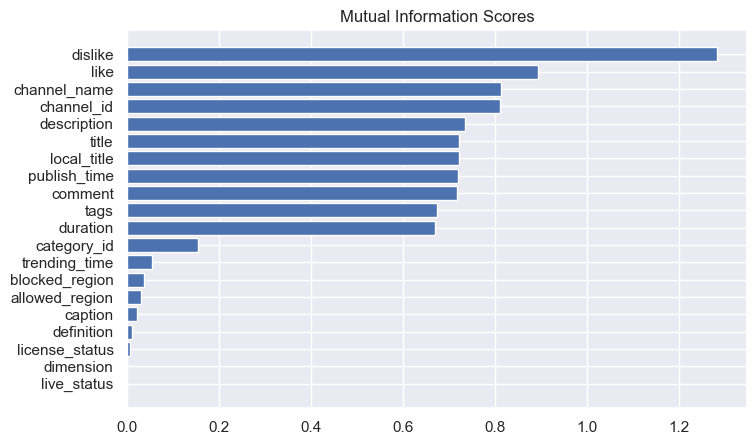

In [83]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

<h3></h3>

<h3>Metode yang akan kami pakai adalah Regressi Linear menggunakan SGDRegressor</h3>

<h3>Regresi yang akan kami lakukan terhadap variabel view dan dislike ialah regresi liner menggunakan SGDRegressor</h3>

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

df_newPredict = df_ytC.copy()
x = df_newPredict['view'].values.reshape(-1,1)
y = df_newPredict['dislike'].values.reshape(-1,1)

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Prekdiksi yang akan kami gunakan ialah regresi linear yang dimana akan dilakukan terhadap variabel View dan Dislike

Pada Prediksi ini juga kami akan menggunakan menggunakan SGDRegressor untuk library regresi linear nya. Dimana pada cara ini terdapat 2 Hyperparameter yang kami gunakan yaitu n_iter dan learning_rate

In [86]:
sgd_reg = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.01)
sgd_reg.fit(x_train,y_train.ravel())

SGDRegressor(penalty=None)

Menurut paper yang telah kami baca , kami menemukan bahwa untuk nilai n_iteration yang lebih tinggi dan nilai learning rate yang rendah akan menghasilkan akurasi pelatihan yang tinggi , maka dari itu kami mengisi max_iter dengan nilai 1000 sebagai asumsi nilai tersebut sudah tinggi dan menggunakan learning_rate default yaitu 0.01 sebagai hyperparameter kami.

sumber paper : http://webcache.googleusercontent.com/search?q=cache:HI4VdO9SQ5QJ:journals.ums.ac.id/index.php/emitor/article/download/6236/3902+&cd=1&hl=en&ct=clnk&gl=id

In [87]:
y_pred_sksgd=sgd_reg.predict(y_test)

In [88]:
print(y_pred_sksgd)

[2.19986325e+17 2.36989832e+19 3.00648450e+18 ... 7.58954070e+18
 1.83321876e+17 6.07254909e+18]


Text(0.5, 1.0, 'View vs Predicted Dislike')

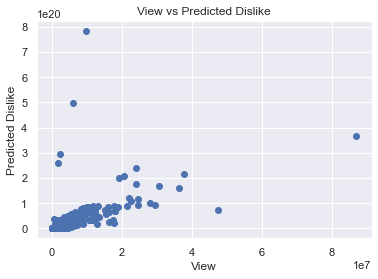

In [89]:
plt.scatter(x_test,y_pred_sksgd)
plt.xlabel('View')
plt.ylabel('Predicted Dislike')
plt.title('View vs Predicted Dislike')

In [90]:
from prettytable import PrettyTable

sklearn_pred=sgd_reg.predict(y_test)
x=PrettyTable()
x.field_names=['SKLearn SGD predicted value']
for itr in range(15):
    x.add_row([sklearn_pred[itr]])
print(x)   

+-----------------------------+
| SKLearn SGD predicted value |
+-----------------------------+
|    2.1998632519761286e+17   |
|    2.3698983246375694e+19   |
|    3.0064844958156636e+18   |
|     -372482759589.89014     |
|    8.341161914564696e+18    |
|    1.1255985658829631e+19   |
|    4.738880075283081e+19    |
|    3.2998000927228273e+18   |
|    4.078916294662643e+17    |
|    6.370444395499857e+17    |
|    9.697746550260326e+18    |
|    1.493159673257252e+19    |
|    2.6398399996817096e+18   |
|    1.590320129498266e+18    |
|    3.836017668318735e+18    |
+-----------------------------+


Hasil prediksi yang dilakukan oleh SGDRegressor dengan memakai learning rate 0.01 dan n_iteration 1000

<h4>Evaluasi</h4>

In [91]:
print(mean_squared_error(y_test,y_pred_sksgd))
print(mean_absolute_error(y_test,y_pred_sksgd))

1.4531230236222754e+39
1.1092963433874702e+19


In [92]:
import statsmodels.api as sm
model = sm.OLS(x_test,y_test)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.427
Model:                            OLS   Adj. R-squared (uncentered):              0.426
Method:                 Least Squares   F-statistic:                              941.5
Date:                Thu, 22 Apr 2021   Prob (F-statistic):                   4.79e-155
Time:                        08:37:04   Log-Likelihood:                         -21012.
No. Observations:                1267   AIC:                                  4.203e+04
Df Residuals:                    1266   BIC:                                  4.203e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           399.8900     13.032     30.685      0.000     374.323     425.457
==============================================================================
Omnibus:                      548.464   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           736089.191
Skew:                          -0.194   Prob(JB):                         0.00
Kurtosis:                     121.081   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Untuk pengujian R-Squared dan Standard Error kami menggunakan stats model OLS.

<h3>Regresi yang akan kami lakukan terhadap variabel view dan comment ialah regresi liner menggunakan SGDRegressor</h3>

In [93]:
x = df_newPredict['view'].values.reshape(-1,1)
y = df_newPredict['like'].values.reshape(-1,1)

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

sgd_reg = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.01)
sgd_reg.fit(x_train,y_train.ravel())

SGDRegressor(penalty=None)

In [95]:
y_pred_sksgd=sgd_reg.predict(y_test)

In [96]:
print(y_pred_sksgd)

[4.75243469e+20 2.43542520e+20 4.96288071e+20 ... 1.13354694e+21
 1.41933162e+19 3.61174329e+19]


In [97]:
from prettytable import PrettyTable

sklearn_pred=sgd_reg.predict(y_test)
x=PrettyTable()
x.field_names=['SKLearn SGD predicted value']
for itr in range(15):
    x.add_row([sklearn_pred[itr]])
print(x)  

+-----------------------------+
| SKLearn SGD predicted value |
+-----------------------------+
|    4.752434686470976e+20    |
|    2.4354252048963112e+20   |
|    4.962880713376754e+20    |
|    3.344511252074994e+20    |
|    1.0815472685531347e+19   |
|    4.989393598656222e+20    |
|    2.0139595675156344e+18   |
|    2.7625024338728255e+20   |
|    1.9183602090493778e+20   |
|    1.0237415295592507e+20   |
|    2.7908635743111463e+19   |
|    4.314717160277164e+18    |
|    8.484760619666134e+19    |
|    1.6601782420610967e+20   |
|    5.329982202998663e+19    |
+-----------------------------+


Text(0.5, 1.0, 'View vs Predicted Like')

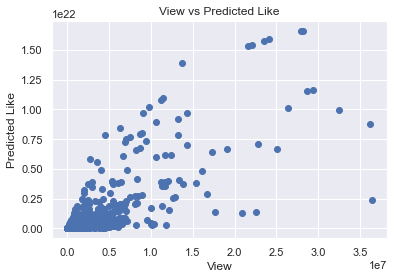

In [98]:
plt.scatter(x_test,y_pred_sksgd)
plt.xlabel('View')
plt.ylabel('Predicted Like')
plt.title('View vs Predicted Like')

<h4>Evaluasi</h4>

In [99]:
print(mean_squared_error(y_test,y_pred_sksgd))
print(mean_absolute_error(y_test,y_pred_sksgd))

3.774900615395655e+42
6.64912782300257e+20


In [100]:
import statsmodels.api as sm
model = sm.OLS(x_test,y_test)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.653
Model:                            OLS   Adj. R-squared (uncentered):              0.653
Method:                 Least Squares   F-statistic:                              2384.
Date:                Thu, 22 Apr 2021   Prob (F-statistic):                   2.41e-293
Time:                        08:37:05   Log-Likelihood:                         -20497.
No. Observations:                1267   AIC:                                  4.100e+04
Df Residuals:                    1266   BIC:                                  4.100e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            11.5564      0.237     48.822      0.000      11.092      12.021
==============================================================================
Omnibus:                     1036.542   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65461.450
Skew:                           3.310   Prob(JB):                         0.00
Kurtosis:                      37.586   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Mengapa model dihasilkan seperti ini? dikarenakan kami menggunakan SGDRegressor untuk melakukan regresi linear sehingga hasil nya akan lebih akurat seperti yang terlihat pada plot yang telah kami buat. Dimana x merupakan data view dan y merupakan prediksi yang dilakukan oleh kami , dengan adanya hal tersebut kami menarik kesimpulan bahwa data yang kami prediksi memiliki keterkaitan dengan data targetnya.

<h4>Perbandingan dengan beragam learning rate dan max iteration (Predicted Dislike)</h4>

In [101]:
df_perbandingan = df_ytC.copy()
x = df_newPredict['view'].values.reshape(-1,1)
y = df_newPredict['dislike'].values.reshape(-1,1)

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Max Iteration 1000 Learning Rate 0.01

In [103]:
sgd_reg = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.01)
sgd_reg.fit(x_train,y_train.ravel())

y_pred_sksgd1=sgd_reg.predict(y_test)

Max Iteration 1000 Learning Rate 0.1

In [104]:
sgd_reg = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(x_train,y_train.ravel())

y_pred_sksgd2=sgd_reg.predict(y_test)

Max Iteration 1500 Learning Rate 0.01

In [105]:
sgd_reg = SGDRegressor(max_iter=1500,tol=1e-3,penalty=None,eta0=0.01)
sgd_reg.fit(x_train,y_train.ravel())

y_pred_sksgd3=sgd_reg.predict(y_test)

Max Iteration 1500 Learning Rate 0.1

In [106]:
sgd_reg = SGDRegressor(max_iter=1500,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(x_train,y_train.ravel())

y_pred_sksgd4=sgd_reg.predict(y_test)

In [107]:
tabelPerbandingan = PrettyTable(["x","max_iter 1000 eta 0.01", "max_iter 1000 eta 0.1", "max_iter 1500 eta 0.01", "max_iter 1500 eta 0.1"])

In [108]:
tabelPerbandingan.add_row(["Mean Square Error", mean_squared_error(y_test,y_pred_sksgd1), mean_squared_error(y_test,y_pred_sksgd2),mean_squared_error(y_test,y_pred_sksgd3),mean_squared_error(y_test,y_pred_sksgd4)])
tabelPerbandingan.add_row(["Mean Absolute Error", mean_absolute_error(y_test,y_pred_sksgd1), mean_absolute_error(y_test,y_pred_sksgd2),mean_absolute_error(y_test,y_pred_sksgd3),mean_absolute_error(y_test,y_pred_sksgd4)])

In [109]:
print(tabelPerbandingan)

+---------------------+------------------------+-----------------------+------------------------+------------------------+
|          x          | max_iter 1000 eta 0.01 | max_iter 1000 eta 0.1 | max_iter 1500 eta 0.01 | max_iter 1500 eta 0.1  |
+---------------------+------------------------+-----------------------+------------------------+------------------------+
|  Mean Square Error  | 3.504462652733614e+36  | 7.325329470893765e+40 | 4.056560480781728e+39  | 1.328114025221298e+41  |
| Mean Absolute Error |  5.60052441498417e+17  | 8.097153155055978e+19 | 1.9054507103417328e+19 | 1.0902759302139188e+20 |
+---------------------+------------------------+-----------------------+------------------------+------------------------+


<h4>Perbandingan dengan beragam learning rate dan max iteration (Predicted Like)</h4>

In [110]:
df_perbandingan = df_ytC.copy()
x = df_newPredict['view'].values.reshape(-1,1)
y = df_newPredict['like'].values.reshape(-1,1)

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Max Iteration 1000 Learning Rate 0.01

In [112]:
sgd_reg = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.01)
sgd_reg.fit(x_train,y_train.ravel())

y_pred_sksgd1=sgd_reg.predict(y_test)

Max Iteration 1000 Learning Rate 0.1

In [113]:
sgd_reg = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(x_train,y_train.ravel())

y_pred_sksgd2=sgd_reg.predict(y_test)

Max Iteration 1500 Learning Rate 0.01

In [114]:
sgd_reg = SGDRegressor(max_iter=1500,tol=1e-3,penalty=None,eta0=0.01)
sgd_reg.fit(x_train,y_train.ravel())

y_pred_sksgd3=sgd_reg.predict(y_test)

Max Iteration 1500 Learning Rate 0.1

In [115]:
sgd_reg = SGDRegressor(max_iter=1500,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(x_train,y_train.ravel())

y_pred_sksgd4=sgd_reg.predict(y_test)

In [116]:
tabelPerbandingan = PrettyTable(["x","max_iter 1000 eta 0.01", "max_iter 1000 eta 0.1", "max_iter 1500 eta 0.01", "max_iter 1500 eta 0.1"])

In [117]:
tabelPerbandingan.add_row(["Mean Square Error", mean_squared_error(y_test,y_pred_sksgd1), mean_squared_error(y_test,y_pred_sksgd2),mean_squared_error(y_test,y_pred_sksgd3),mean_squared_error(y_test,y_pred_sksgd4)])
tabelPerbandingan.add_row(["Mean Absolute Error", mean_absolute_error(y_test,y_pred_sksgd1), mean_absolute_error(y_test,y_pred_sksgd2),mean_absolute_error(y_test,y_pred_sksgd3),mean_absolute_error(y_test,y_pred_sksgd4)])

In [118]:
print(tabelPerbandingan)

+---------------------+------------------------+-----------------------+------------------------+------------------------+
|          x          | max_iter 1000 eta 0.01 | max_iter 1000 eta 0.1 | max_iter 1500 eta 0.01 | max_iter 1500 eta 0.1  |
+---------------------+------------------------+-----------------------+------------------------+------------------------+
|  Mean Square Error  | 1.220465436262614e+41  | 8.083939470641327e+40 | 1.7446037102560488e+42 | 1.2299889734433293e+44 |
| Mean Absolute Error | 1.0717937775087804e+20 | 8.722882953149325e+19 | 4.0522561003250555e+20 | 3.402507560752877e+21  |
+---------------------+------------------------+-----------------------+------------------------+------------------------+


<h4>Analisis Clustering</h4>

In [119]:
df_perbandingan = df_ytC.copy()

In [120]:
df_perbandingan = df_perbandingan.select_dtypes(include=['float64','int64'])

In [121]:
df_perbandingan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category_id  6335 non-null   int64  
 1   view         6335 non-null   int64  
 2   like         6335 non-null   float64
 3   dislike      6335 non-null   float64
 4   comment      6335 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 247.6 KB


ambil data variabel yang akan kita gunakan untuk Clustering menggunakan k-mean

In [122]:
df_uji = df_perbandingan.drop(["dislike","comment","category_id"],axis=1)

Melakukan data prepprocessing 

In [123]:
x_array = np.array(df_uji)
print(x_array)

[[7.806846e+06 8.579020e+05]
 [8.850380e+05 6.765000e+03]
 [8.897080e+05 4.789500e+04]
 ...
 [8.965400e+04 1.248000e+03]
 [1.353291e+06 1.578900e+04]
 [6.525000e+04 4.843000e+03]]


In [124]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.06664768, 0.11442176],
       [0.00742266, 0.00090227],
       [0.00746262, 0.00638794],
       ...,
       [0.00061712, 0.00016645],
       [0.01142917, 0.00210584],
       [0.00040831, 0.00064593]])

Melakukan Clustering menggunakan KMeans dengan memilih nilai k = 4 

In [125]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state=123)

In [126]:
kmeans.fit(x_scaled)
print(kmeans.cluster_centers_)

[[0.00838382 0.00453834]
 [0.06056936 0.04425794]
 [0.16228587 0.2140231 ]
 [0.89517819 0.96884096]]


In [127]:
df_uji["kluster"] = kmeans.labels_

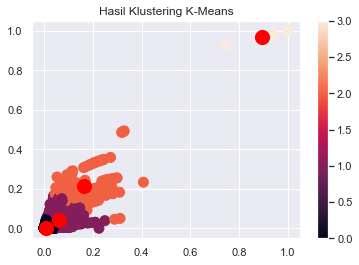

In [128]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = df_uji.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="red", s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

Hasil dari clustering view dan like yang kami dapat ialah data terbagi menjadi 4 clustering dimana titik merah merupakan centroid dari tiap cluster yang ada

<h4>WCSS Menggunakan Method Elbow</h4>

Disini kita menggunakan Metode Elbow untuk memastikan berapa nilai K yang akan kami gunakan untuk melakukan clustering selanjutnya

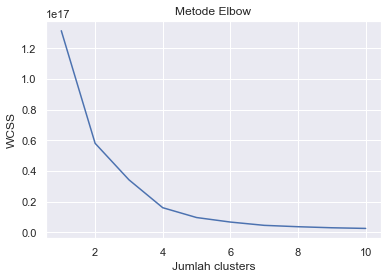

In [129]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_uji)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

Pada grafik diatas dapat kita lihat bahwa garis yang membentuk siku ialah 2 - 3 - 4 , maka kita akan menggunakan nilai K yang grafiknya akan membentuk siku. Dalam kasus ini kita akan memilih nilai K yang paling besar yaitu 4 sebalah clustering selanjutnya.

<h5>Clustering menggunakan 3 variabel View , Like , Dislike</h5>

In [130]:
df_perbandingan = df_perbandingan.select_dtypes(include=['float64','int64'])

In [131]:
df_uji2 = df_perbandingan.drop(["comment","category_id"],axis=1)

In [132]:
x_array = np.array(df_uji2)

In [133]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.06664768, 0.11442176, 0.14066142],
       [0.00742266, 0.00090227, 0.00737833],
       [0.00746262, 0.00638794, 0.00310789],
       ...,
       [0.00061712, 0.00016645, 0.00036804],
       [0.01142917, 0.00210584, 0.00132611],
       [0.00040831, 0.00064593, 0.00030378]])

In [134]:
kmeans = KMeans(n_clusters = 4, random_state=123)
kmeans.fit(x_scaled)
print(kmeans.cluster_centers_)

[[0.00917787 0.00521346 0.0053977 ]
 [0.17941339 0.20652659 0.20657037]
 [0.06746346 0.05913099 0.04921849]
 [0.89517819 0.96884096 0.56772619]]


In [135]:
df_uji["kluster"] = kmeans.labels_

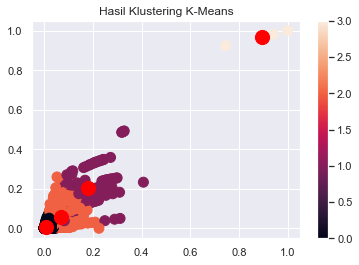

In [136]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = df_uji.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="red", s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

Hasil clustering dari 3 variabel menggunakan kmeans 4 menghasilkan pembagian menjadi 4 cluster dan titik merah sebagai centroid

<h4>Gaussian Mixture Model</h4>

In [137]:
from sklearn.mixture import GaussianMixture

In [138]:
df_ytC

publish_time                channel_id  \
0     2021-02-05T09:00:34Z  UCEf_Bc-KVd7onSeifS3py9g   
1     2021-02-04T15:54:08Z  UCYEa4_MC7OFjcWrO6SO-u8g   
2     2021-02-06T03:00:22Z  UCu12RxQjRQyh79YBYvEDkOg   
3     2021-02-05T20:26:08Z  UCCuzDCoI3EUOo_nhCj4noSw   
4     2021-02-03T23:14:54Z  UC14UlmYlSNiQCBe9Eookf_A   
...                    ...                       ...   
6330  2021-03-21T19:20:32Z  UCChcWqwYXCEs657MQ00qVWA   
6331  2021-03-23T12:00:10Z  UC6FjcBcH9NVHdfFSvNfHmuA   
6332  2021-03-21T11:57:05Z  UCMbj5wPCBvGALjVnsWKcrIA   
6333  2021-03-21T13:42:44Z  UC9w-h_ciMmX64TcLRcb1xPg   
6334  2021-03-23T08:07:26Z  UCKl0lSAwg7B50fuvyi9li3Q   

                                                  title  \
0                           aespa 에스파 'Forever (약속)' MV   
1     [FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...   
2        CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12)   
3                           With Windah Basudara & Hans   
4     🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...   
...                                                 ...   
6330  Leicester City v Manchester United | Key Momen...   
6331  THIS OR THAT: BORIS DUKUNG ENZY DIKTA JADI SAH...   
6332  ⚡️ Kirain Flagship Bos! Samsung Galaxy A72 Ind...   
6333  [11화 예고] "겁나면 도망가봐" 폭주하는 옥택연 자극하는 송중기의 도발!#빈센조...   
6334  Justice League Snyder's Cut - (NGOPI - Ngobrol...   

                                            description  \
0     aespa's new single "Forever" is out!\nListen a...   
1     Jakarta, https://www.tvonenews.com - Ketua umu...   
2     Road Party Season 2: Cabriolet Challenge\n\nEp...   
3     Join this channel to get access to perks:\nhtt...   
4     With just two minutes to play, Barça looked to...   
...                                                 ...   
6330  Leicester City hosted Manchester United in the...   
6331  KFC INDONESIA X KUY! ENTERTAINMENT PRESENT : T...   
6332  Unboxing & review singkat Samsung Galaxy A72 I...   
6333  #tvN 토일드라마 {빈센조} \n\n조직의 배신으로 한국으로 오게 된 이탈리아 마...   
6334  Akhirnya tiba juga saatnya! :D\nKali ini kita ...   

                channel_name  \
0                     SMTOWN   
1     Indonesia Lawyers Club   
2                   Motomobi   
3                         yb   
4               FC Barcelona   
...                      ...   
6330     The Emirates FA Cup   
6331       KUY Entertainment   
6332            Kepoin Tekno   
6333               tvN DRAMA   
6334       Tara Arts Network   

                                                   tags  category_id  \
0                                            vidYoutube           10   
1     ['tvone', 'tv one', 'tvonenews', 'indonesia la...           25   
2     ['MotoMobi', 'Mobil', 'motor', 'review', 'indo...            2   
3                                            vidYoutube           20   
4     ['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...           17   
...                                                 ...          ...   
6330  ['emirates fa cup', 'emirates fa cup quarter f...           17   
6331  ['KUY Entertainment', 'KUY Media', 'KUY', 'enz...           24   
6332  ['Kepoin Tekno', 'Unboxing', 'Samsung Galaxy A...           28   
6333  ['2pm', 'jeonyeobeen', 'mafia', 'mafia vincenz...           24   
6334  ['snyders cut', 'snyder cut review', 'snyder c...           24   

     live_status                                        local_title  duration  \
0           none                        aespa 에스파 'Forever (약속)' MV    PT5M7S   
1           none  [FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...  PT42M30S   
2           none     CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12)  PT46M43S   
3           none                        With Windah Basudara & Hans  PT45M59S   
4           none  🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...   PT5M12S   
...          ...                                                ...       ...   
6330        none  Leicester City v Manchester United | Key Momen...   PT2M14S   
6331        none  THIS OR

<h1> data pendukung </h1>
<a href="https://gist.github.com/dgp/1b24bf2961521bd75d6c">https://gist.github.com/dgp/1b24bf2961521bd75d6c</a>

In [139]:
df_ytC[['category_id','like','view','comment','dislike']]

category_id      like     view  comment  dislike
0              10  857902.0  7806846  94961.0  24078.0
1              25    6765.0   885038   6365.0   1263.0
2               2   47895.0   889708   8785.0    532.0
3              20   91973.0  1006854  12957.0   3967.0
4              17  218131.0  6275035  12799.0   4289.0
...           ...       ...      ...      ...      ...
6330           17   15523.0  1759973   1722.0    907.0
6331           24   29326.0   760192   1980.0    350.0
6332           28    1248.0    89654    469.0     63.0
6333           24   15789.0  1353291   1519.0    227.0
6334           24    4843.0    65250   1125.0     52.0

[6335 rows x 5 columns]

In [140]:
df_ytC['category_id'].unique()

array([10, 25,  2, 20, 17, 24, 23, 22, 26, 29,  1, 27, 28, 15, 19],
      dtype=int64)

In [141]:
# df_ytC2 = df_ytC.loc[(df_ytC['category_id']==1)]

In [142]:
df_ytC2 = df_ytC

In [143]:
gmm = GaussianMixture(n_components=4)
df_gmm = df_ytC2.select_dtypes(include=['float64','int64'])
df_gmm = df_gmm[["view","dislike","like"]]
gmm.fit(df_gmm)

GaussianMixture(n_components=4)

In [144]:
nama = gmm.predict(df_gmm)
lokasi = pd.DataFrame(df_gmm)
lokasi["kelompok"] = nama
lokasi.columns = ["view","dislike","like","kelompok"]
color = ["blue","yellow","red","green"]

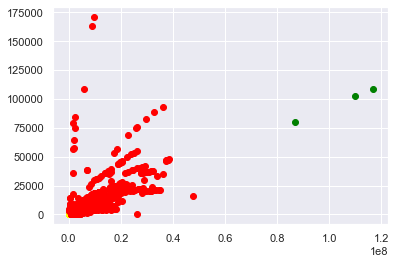

In [145]:
for k in range (0,4):
    df_gmm = lokasi[lokasi["kelompok"] == k]
    plt.scatter(df_gmm["view"],df_gmm["dislike"],c = color[k])
plt.show()

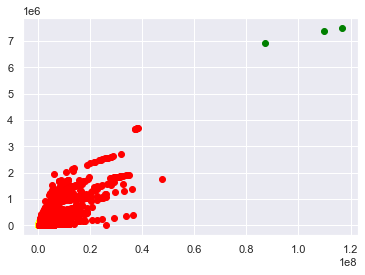

In [146]:
for k in range (0,4):
    df_gmm = lokasi[lokasi["kelompok"] == k]
    plt.scatter(df_gmm["view"],df_gmm["like"],c = color[k])
plt.show()

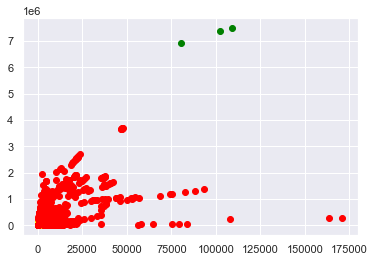

In [147]:
for k in range (0,4):
    df_gmm = lokasi[lokasi["kelompok"] == k]
    plt.scatter(df_gmm["dislike"],df_gmm["like"],c = color[k])
plt.show()

Text(0.5, 0, 'dislike')

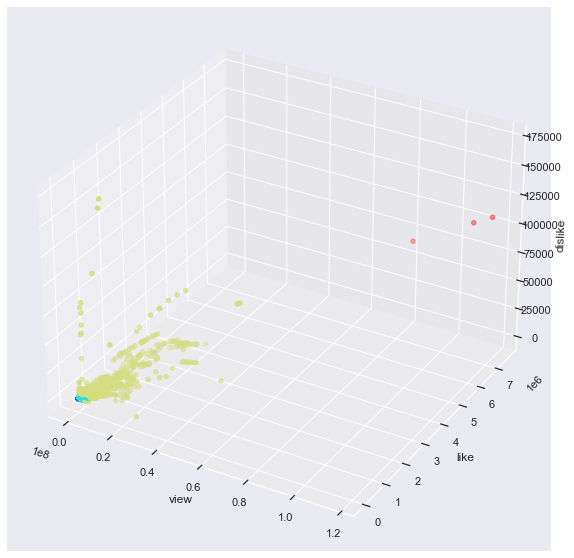

In [148]:
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")
ax.scatter3D(lokasi['view'],lokasi['like'], lokasi['dislike'],c=lokasi['kelompok'], cmap='rainbow')
ax.set_xlabel("view")
ax.set_ylabel("like")
ax.set_zlabel("dislike")

In [149]:
import plotly.express as px
df = lokasi
fig = px.scatter_3d(df, x='view', y='like', z='dislike',color='kelompok')
fig.show()

Dalam 3D Plot berdasarkan variabel yang kita pilih kita dapat melihat data-data nya secara rinci. Serta dapat melihat anomalinya. Disini kita dapat melihat ada beberapa anomli contohnya bagian di warna ungu -> Dimana data disana menunjukan jumlah views yang banyak namun memiliki like ataupun dislike yang nilainya tidak besar berbeda dengan beberapa data berwarna biru yang memiliki nilai data view dan like yang sebanding.